<a href="https://colab.research.google.com/github/INmais/Energy_Services_2022/blob/main/Energy_Services_2022_Office_Hours_22_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project #1 - Energy Demand Forecast

###Due Mar 31, 11:59 PM

The objective is to develop a model to forecast electricity consumption in the buildings of IST.
To develop the model, the following data files have been collected:
- 2017 and 2018 electricity consumption data in 4 buildings (central, civil, south tower and north tower);
- list of holidays in Lisbon for 2017,2018, and 2019
- weather data for the weather station in South tower for 2017 and 2018

The deliverable of this project are:
- a python file (py) or a python notebook (ipynb) that uses the raw data files  only.

A bulding has been assign to each student based on the first name:
- From Ashraf to David: Central Building
- From Diana to Luis: Civil Building
- From Madalena to Olivia: North Tower
- From Omar to Vic: South Tower

Grading (40 points):
- Data Cleaning and preparation (8)
- Exploratory Data Analysis (8)
- Clustering (4)
- Feature Selection (8)
- Regression (8)
- Results (4)



##Weather (description)

- yyyy-mm-dd hh:mm:ss (date format)
- temp_C (temperature (Cº)
- HR (Relative humidity %)          
- windSpeed_m/s (windSpeed m/s)
- windGust_m/s  (windGust m/s)
- pres_mbar (Atmospheric pressure  mbar)             
- solarRad_W/m2 (Solar radiation (irradiance) in W/m2)
- rain_mm/h  (precitipation mm/hour)
- rain_day (rain/precitipation mm/day)              

More info (in PT): https://meteo.tecnico.ulisboa.pt/about



In [140]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive/',force_remount=True) #

Mounted at /content/drive/


In [141]:
! pip install missingno sklearn

In [142]:
#import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Timeseries

In [143]:
DATA_FILEPATH_temp = '/content/drive/MyDrive/EPP/Science Dissemination and Teaching Skills - Dem/Data/Project#1/IST_Central_Pav_2017_Ene_Cons.csv - IST_Central_Pav_2017_Ene_Cons.csv.csv' 
raw_data_temp = pd.read_csv(DATA_FILEPATH_temp)
raw_data_temp.tail(10)

,Date_start,Power_kW
8750,31-12-2017 14:00,108.350843
8751,31-12-2017 15:00,108.125217
8752,31-12-2017 16:00,107.569526
8753,31-12-2017 17:00,109.545736
8754,31-12-2017 18:00,107.877615
8755,31-12-2017 19:00,108.946301
8756,31-12-2017 20:00,108.813396
8757,31-12-2017 21:00,106.699884
8758,31-12-2017 22:00,107.669780
8759,31-12-2017 23:00,104.520443


In [144]:
raw_data_temp['Date_start'] = pd.to_datetime(raw_data_temp['Date_start'], format='%d-%m-%Y %H:%M')

In [145]:
raw_data_temp['Date_start'].tail()

8755   2017-12-31 19:00:00
8756   2017-12-31 20:00:00
8757   2017-12-31 21:00:00
8758   2017-12-31 22:00:00
8759   2017-12-31 23:00:00
Name: Date_start, dtype: datetime64[ns]

In [146]:
raw_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date_start  8760 non-null   datetime64[ns]
 1   Power_kW    8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


Can you graphical tools to inspect, for example:

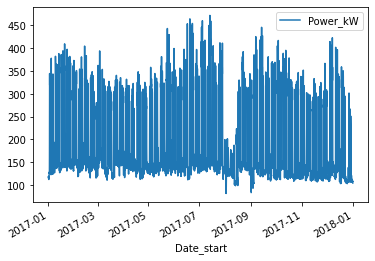

In [147]:
raw_data_temp.plot(x='Date_start')
plt.show()

### Fixig irregular Times Series

In [148]:
raw_data_temp.index = raw_data_temp.Date_start # set Date_start as index
resample_index = pd.date_range(start=raw_data_temp.index[0], end=raw_data_temp.index[-1], freq='H')
dummy_frame = pd.DataFrame(np.NaN, index=resample_index, columns=raw_data_temp.columns)
raw_data_temp.combine_first(dummy_frame).interpolate('ffill').iloc[:6]

,Date_start,Power_kW
2017-01-01 00:00:00,2017-01-01 00:00:00,117.823342
2017-01-01 01:00:00,2017-01-01 01:00:00,119.190699
2017-01-01 02:00:00,2017-01-01 02:00:00,117.972992
2017-01-01 03:00:00,2017-01-01 03:00:00,116.413288
2017-01-01 04:00:00,2017-01-01 04:00:00,116.172384
2017-01-01 05:00:00,2017-01-01 05:00:00,114.878282


### Creatig data series with data_range () function

In [149]:
# Create date series using date_range() function
## recall H per year (24*365)
date_series = pd.date_range('1/01/2017', periods = 8760, freq ='H')
date_series

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-12-31 14:00:00', '2017-12-31 15:00:00',
               '2017-12-31 16:00:00', '2017-12-31 17:00:00',
               '2017-12-31 18:00:00', '2017-12-31 19:00:00',
               '2017-12-31 20:00:00', '2017-12-31 21:00:00',
               '2017-12-31 22:00:00', '2017-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='H')

In [150]:
date_series = date_series.to_series() # convert to series
#date_series = date_series.strftime('%Y-%m-%d %H:%M')
#date_series = date_series.to_frame()

In [151]:
date_series

2017-01-01 00:00:00   2017-01-01 00:00:00
2017-01-01 01:00:00   2017-01-01 01:00:00
2017-01-01 02:00:00   2017-01-01 02:00:00
2017-01-01 03:00:00   2017-01-01 03:00:00
2017-01-01 04:00:00   2017-01-01 04:00:00
                              ...        
2017-12-31 19:00:00   2017-12-31 19:00:00
2017-12-31 20:00:00   2017-12-31 20:00:00
2017-12-31 21:00:00   2017-12-31 21:00:00
2017-12-31 22:00:00   2017-12-31 22:00:00
2017-12-31 23:00:00   2017-12-31 23:00:00
Freq: H, Length: 8760, dtype: datetime64[ns]

In [152]:
date_series = date_series.reset_index(drop=True) #reset index

##### merging two dataframes

In [153]:
raw_data_temp = raw_data_temp.reset_index(drop=True)

In [154]:
raw_data_temp

,Date_start,Power_kW
0,2017-01-01 00:00:00,117.823342
1,2017-01-01 01:00:00,119.190699
2,2017-01-01 02:00:00,117.972992
3,2017-01-01 03:00:00,116.413288
4,2017-01-01 04:00:00,116.172384
...,...,...
8755,2017-12-31 19:00:00,108.946301
8756,2017-12-31 20:00:00,108.813396
8757,2017-12-31 21:00:00,106.699884
8758,2017-12-31 22:00:00,107.669780


In [155]:
result = pd.concat([raw_data_temp, date_series], axis = 1)

In [156]:
result = result.rename(columns={"Date_start": "Date_start", "Power_kW": "Power_kW", 0: "Date"})

In [157]:
result

,Date_start,Power_kW,Date
0,2017-01-01 00:00:00,117.823342,2017-01-01 00:00:00
1,2017-01-01 01:00:00,119.190699,2017-01-01 01:00:00
2,2017-01-01 02:00:00,117.972992,2017-01-01 02:00:00
3,2017-01-01 03:00:00,116.413288,2017-01-01 03:00:00
4,2017-01-01 04:00:00,116.172384,2017-01-01 04:00:00
...,...,...,...
8755,2017-12-31 19:00:00,108.946301,2017-12-31 19:00:00
8756,2017-12-31 20:00:00,108.813396,2017-12-31 20:00:00
8757,2017-12-31 21:00:00,106.699884,2017-12-31 21:00:00
8758,2017-12-31 22:00:00,107.669780,2017-12-31 22:00:00


In [158]:
result2 =result[['Date','Power_kW',]]

In [159]:
result2.set_index('Date', inplace=True, drop=True)

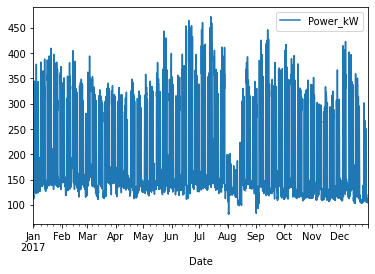

In [160]:
result2.plot()

## Merge, join, concatenate and compare

Remember that pandas uses “inner” merge by default.

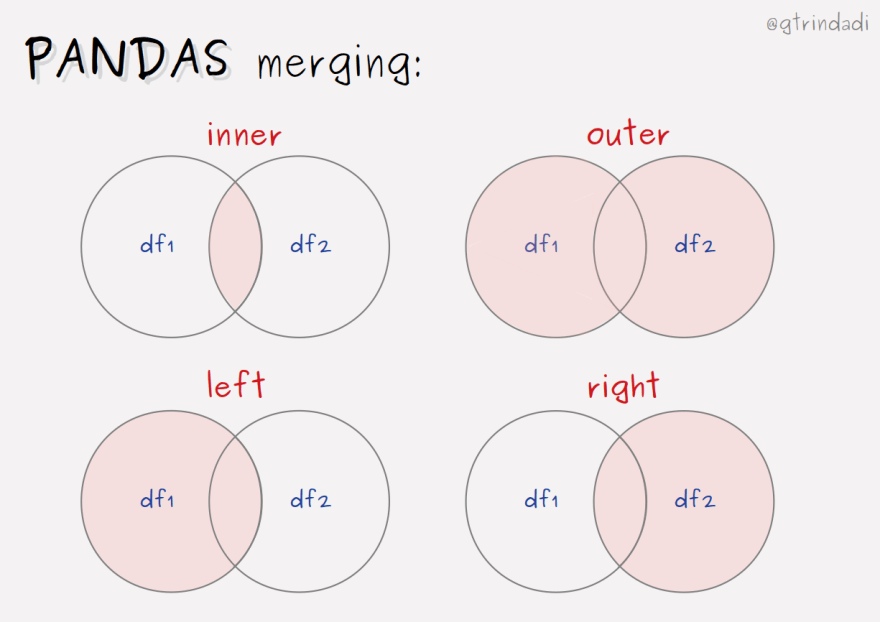

(img source: https://dev.to/gtrindadi/pandas-4-merging-8b8)

For examples: https://pandas.pydata.org/docs/user_guide/merging.html

#### Please confirm that timedate is all on the same format

In [161]:
meteo_url = '/content/drive/MyDrive/EPP/Science Dissemination and Teaching Skills - Dem/Data/Project#1/IST_meteo_data_2017_2018_2019.csv - IST_meteo_data_2017_2018_2019.csv.csv'
raw = pd.read_csv(meteo_url)

In [162]:
raw

,yyyy-mm-dd hh:mm:ss,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
0,2017-01-01 0:00:00,8.72,74.60,2.138,3.774,1029,1.163,0.0,0.0
1,2017-01-01 0:05:00,8.68,74.60,1.929,3.019,1029,1.496,0.0,0.0
2,2017-01-01 0:10:00,8.69,74.50,1.824,2.516,1029,1.025,0.0,0.0
3,2017-01-01 0:15:00,8.62,75.10,2.264,3.271,1029,1.690,0.0,0.0
4,2017-01-01 0:20:00,8.63,75.00,3.061,3.774,1029,1.108,0.0,0.0
...,...,...,...,...,...,...,...,...,...
215004,2019-04-11 14:43:00,15.70,43.97,0.000,0.000,1021,348.000,0.0,0.0
215005,2019-04-11 14:48:00,15.35,44.42,0.000,0.000,1021,273.000,0.0,0.0
215006,2019-04-11 14:53:00,15.34,41.15,0.000,0.000,1021,320.900,0.0,0.0
215007,2019-04-11 15:18:00,15.26,42.01,0.000,0.000,1021,615.900,0.0,0.0


In [163]:
raw['Date'] = pd.to_datetime(raw['yyyy-mm-dd hh:mm:ss'])
#use date as an index
raw = raw.set_index('Date')
#resampling to make hourly data with mean values
raw = raw.resample('1H').mean()

In [164]:
raw.index = raw.index.strftime('%Y-%m-%d %H:%M') #fixig format

In [165]:
raw

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
Date,,,,,,,,
2017-01-01 00:00,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083,0.0,0.0
2017-01-01 01:00,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333,0.0,0.0
2017-01-01 02:00,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083,0.0,0.0
2017-01-01 03:00,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000,0.0,0.0
2017-01-01 04:00,6.500250,81.241667,4.006000,5.262333,1028.000000,0.891000,0.0,0.0
...,...,...,...,...,...,...,...,...
2019-04-11 11:00,15.615000,47.215000,0.000000,0.000000,1022.083333,869.200000,0.0,0.0
2019-04-11 12:00,15.872500,46.630000,0.000000,0.000000,1022.000000,640.591667,0.0,0.0
2019-04-11 13:00,16.315833,45.955833,0.000000,0.000000,1021.416667,855.808333,0.0,0.0


In [166]:
civil_2018_url = '/content/drive/MyDrive/EPP/Science Dissemination and Teaching Skills - Dem/Data/Project#1/IST_Civil_Pav_2018_Ene_Cons.csv - IST_Civil_Pav_2018_Ene_Cons.csv.csv'
raw2 = pd.read_csv(civil_2018_url)

In [167]:
civil_2017_url = '/content/drive/MyDrive/EPP/Science Dissemination and Teaching Skills - Dem/Data/Project#1/IST_Civil_Pav_2017_Ene_Cons.csv - IST_Civil_Pav_2017_Ene_Cons.csv.csv'
raw3 = pd.read_csv(civil_2017_url)

In [168]:
holiday_url = '/content/drive/MyDrive/EPP/Science Dissemination and Teaching Skills - Dem/Data/Project#1/holiday_17_18_19.csv - holiday_17_18_19.csv.csv'
raw4 = pd.read_csv(holiday_url)

In [169]:
#set date as an index for holiday data
raw4 = raw4.set_index('Date')
raw4

,Holiday
Date,
01.01.2017,1
14.04.2017,1
16.04.2017,1
25.04.2017,1
01.05.2017,1
10.06.2017,1
13.06.2017,1
15.06.2017,1
15.08.2017,1


In [170]:
#merging raw2 and raw3 files (power data)
merged=raw3.append(raw2)
merged

,Date_start,Power_kW
0,1-1-2017 0:00,74.897706
1,1-1-2017 1:00,75.173557
2,1-1-2017 2:00,74.208175
3,1-1-2017 3:00,73.735889
4,1-1-2017 4:00,75.102351
...,...,...
8755,31-12-2018 19:00,99.453746
8756,31-12-2018 20:00,83.188111
8757,31-12-2018 21:00,82.704752
8758,31-12-2018 22:00,80.618406


In [171]:
#using date as an index
merged['Date'] = pd.to_datetime(merged['Date_start'])
#use date as an index
merged = merged.set_index('Date')
merged

,Date_start,Power_kW
Date,,
2017-01-01 00:00:00,1-1-2017 0:00,74.897706
2017-01-01 01:00:00,1-1-2017 1:00,75.173557
2017-01-01 02:00:00,1-1-2017 2:00,74.208175
2017-01-01 03:00:00,1-1-2017 3:00,73.735889
2017-01-01 04:00:00,1-1-2017 4:00,75.102351
...,...,...
2018-12-31 19:00:00,31-12-2018 19:00,99.453746
2018-12-31 20:00:00,31-12-2018 20:00,83.188111
2018-12-31 21:00:00,31-12-2018 21:00,82.704752


In [172]:
merged.index = merged.index.strftime('%Y-%m-%d %H:%M') #fixig date format

#### Merge two dataframes by index

In [174]:
#merge power data with meteo data
#how='inner' default
raw.index.astype('datetime64[ns]')
merged.index.astype('datetime64[ns]')
result_merged = pd.merge(raw, merged, left_index=True, right_index=True)

## Missing Values

Some methods:

https://pandas.pydata.org/docs/user_guide/missing_data.html

Depends on the specific case, sometimes not using can also be a strategy

### Single imputation

In [175]:
result_merged

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,Date_start,Power_kW
Date,,,,,,,,,,
2017-01-01 00:00,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083,0.0,0.0,1-1-2017 0:00,74.897706
2017-01-01 01:00,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333,0.0,0.0,1-1-2017 1:00,75.173557
2017-01-01 02:00,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083,0.0,0.0,1-1-2017 2:00,74.208175
2017-01-01 03:00,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000,0.0,0.0,1-1-2017 3:00,73.735889
2017-01-01 04:00,6.500250,81.241667,4.006000,5.262333,1028.000000,0.891000,0.0,0.0,1-1-2017 4:00,75.102351
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00,13.361667,54.013333,0.000000,0.000000,1031.000000,1.112333,0.0,0.0,31-12-2018 19:00,99.453746
2018-12-31 20:00,12.810000,55.441667,0.000000,0.000000,1031.000000,1.322417,0.0,0.0,31-12-2018 20:00,83.188111
2018-12-31 21:00,12.565000,55.291667,0.000000,0.000000,1031.000000,1.195500,0.0,0.0,31-12-2018 21:00,82.704752


In [176]:
result_merged.loc['2018-10-27':'2018-12-09']

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,Date_start,Power_kW
Date,,,,,,,,,,
2018-10-27 00:00,14.663333,74.083333,0.0,0.0,1014.500000,2.053750,0.0,0.0,27-10-2018 00:00,122.471131
2018-10-27 01:00,14.472500,76.583333,0.0,0.0,1014.333333,2.792250,0.0,0.0,27-10-2018 01:00,114.233224
2018-10-27 02:00,14.452727,76.409091,0.0,0.0,1014.000000,2.019091,0.0,0.0,27-10-2018 02:00,113.116840
2018-10-27 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27-10-2018 03:00,107.157324
2018-10-27 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27-10-2018 04:00,104.352431
...,...,...,...,...,...,...,...,...,...,...
2018-12-08 19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12-8-2018 19:00,70.424346
2018-12-08 20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12-8-2018 20:00,68.699183
2018-12-08 21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12-8-2018 21:00,70.024984


In [177]:
result_merged = result_merged.set_index(pd.DatetimeIndex(result_merged.index))

In [178]:
result_merged

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,Date_start,Power_kW
Date,,,,,,,,,,
2017-01-01 00:00:00,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083,0.0,0.0,1-1-2017 0:00,74.897706
2017-01-01 01:00:00,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333,0.0,0.0,1-1-2017 1:00,75.173557
2017-01-01 02:00:00,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083,0.0,0.0,1-1-2017 2:00,74.208175
2017-01-01 03:00:00,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000,0.0,0.0,1-1-2017 3:00,73.735889
2017-01-01 04:00:00,6.500250,81.241667,4.006000,5.262333,1028.000000,0.891000,0.0,0.0,1-1-2017 4:00,75.102351
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,13.361667,54.013333,0.000000,0.000000,1031.000000,1.112333,0.0,0.0,31-12-2018 19:00,99.453746
2018-12-31 20:00:00,12.810000,55.441667,0.000000,0.000000,1031.000000,1.322417,0.0,0.0,31-12-2018 20:00,83.188111
2018-12-31 21:00:00,12.565000,55.291667,0.000000,0.000000,1031.000000,1.195500,0.0,0.0,31-12-2018 21:00,82.704752


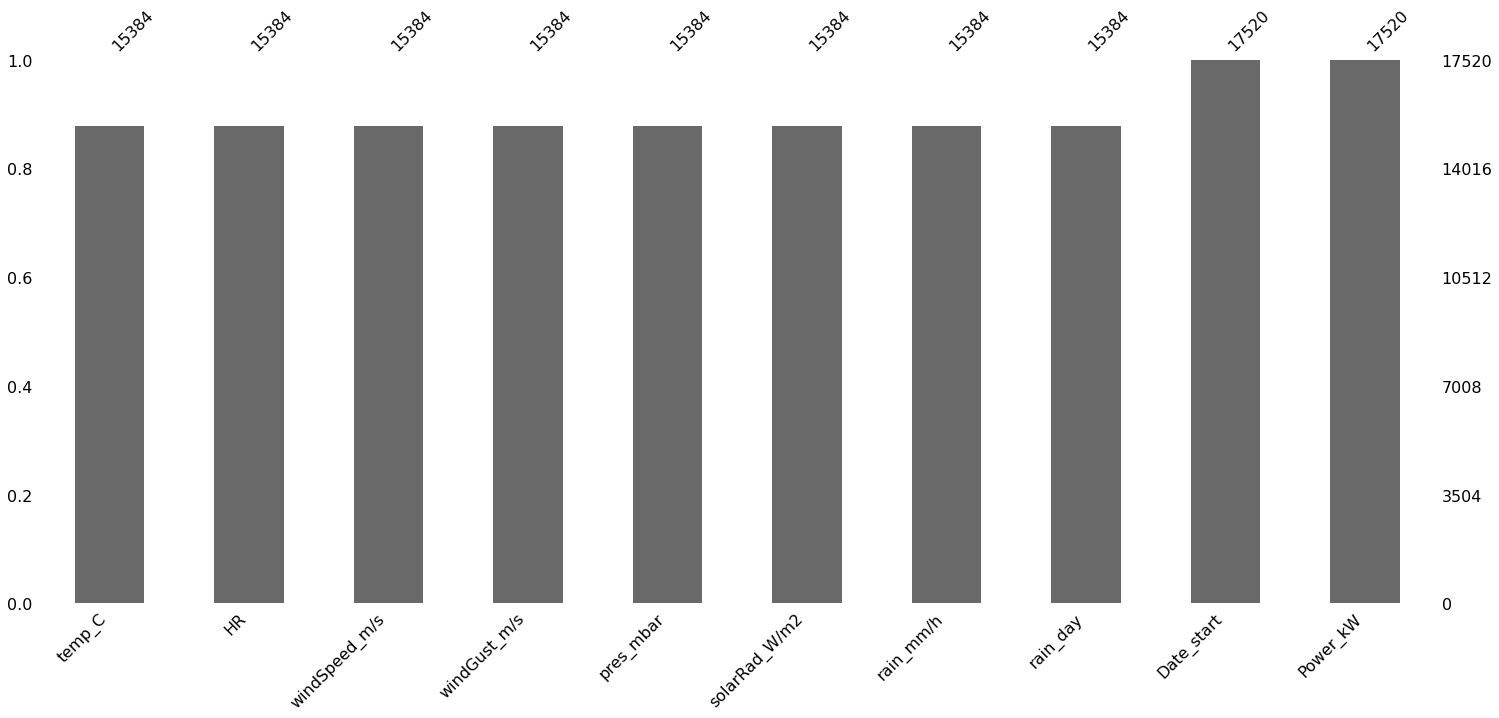

In [179]:
#visualize data 

import missingno as msno
import matplotlib.pyplot as plt

# Plot amount of missingness
msno.bar(result_merged) # you can see pandas-profilin count part

plt.show()

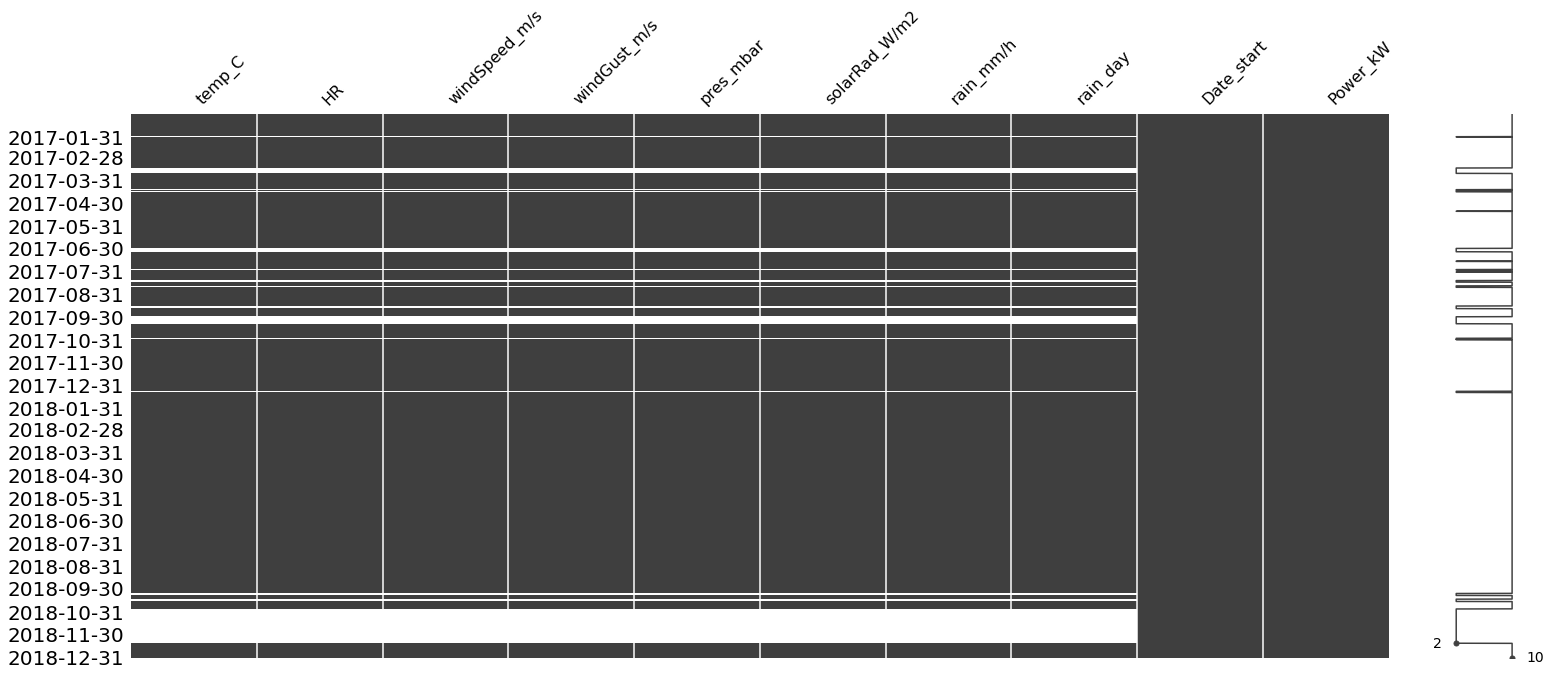

In [180]:
# Plot nullity matrix of weather with frequency 'M'
msno.matrix(result_merged, freq='M') # this part actually displays the missingness types, also more visible version of pandas-profiling matrix.

plt.show()

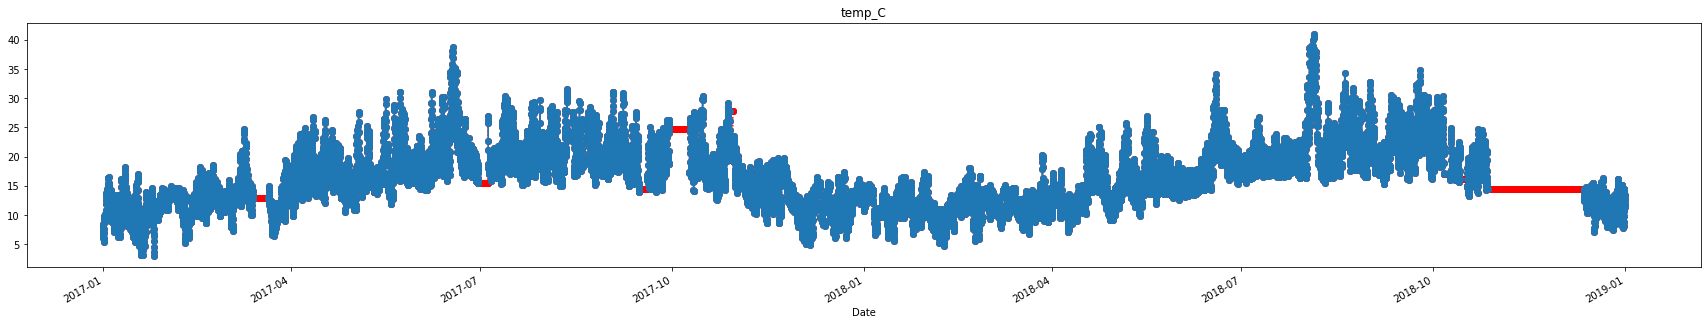

In [181]:
### Forward Fill
# Impute weather DataFrame with ffill method
ffill_imputed = result_merged.copy(deep=True)

ffill_imputed.fillna(method='ffill',inplace=True)

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['temp_C'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
result_merged['temp_C'].plot(title='temp_C', marker='o', figsize=(30, 5))

plt.show()

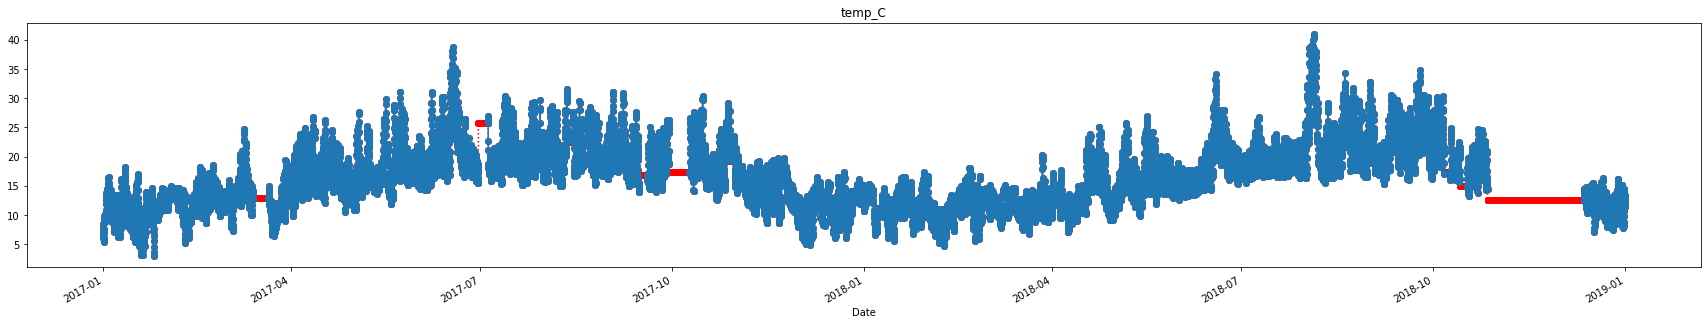

In [187]:
### Back Fill Fill
# Impute weather DataFrame with bfill method
bfill_imputed = result_merged.copy(deep=True)

bfill_imputed.fillna(method='bfill',inplace=True)

# Plot the imputed DataFrame bfill_imp in red dotted style 
bfill_imputed['temp_C'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
result_merged['temp_C'].plot(title='temp_C', marker='o', figsize=(30, 5))

plt.show()

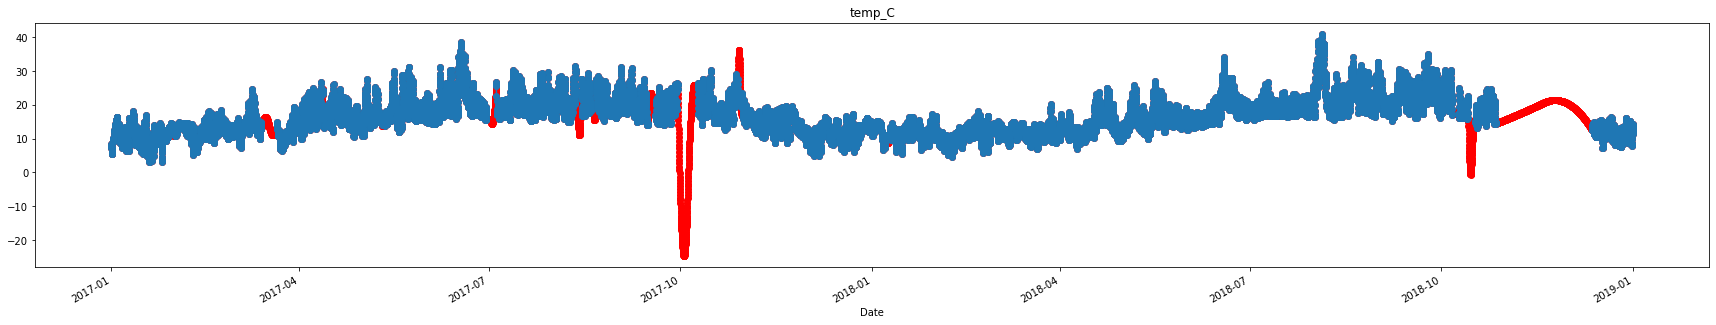

In [188]:
# Interpolate the NaNs quadratically

quadratic_imput=result_merged.copy(deep=True)

quadratic_imput.interpolate(method='quadratic', inplace=True)

quadratic_imput['temp_C'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

result_merged['temp_C'].plot(title='temp_C', marker='o', figsize=(30, 5))

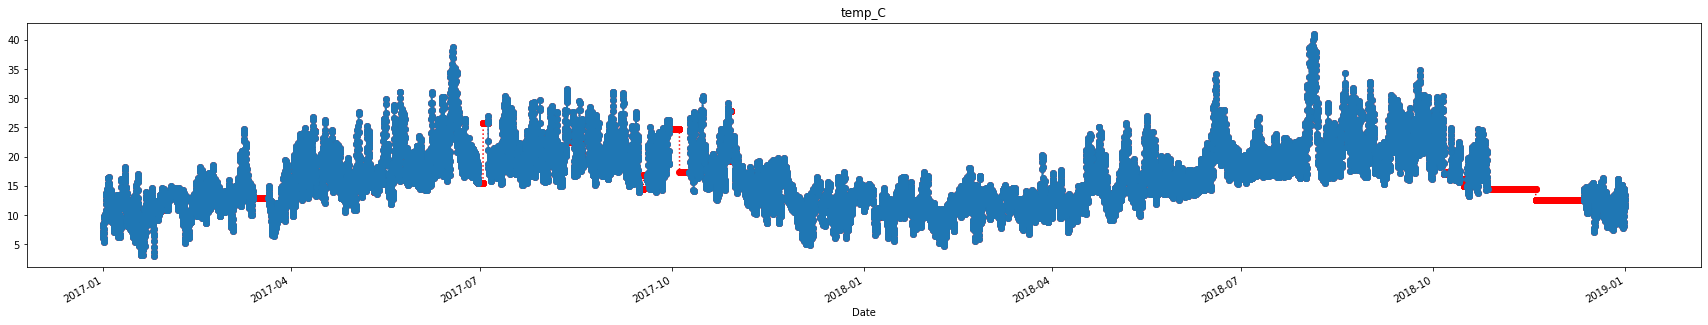

In [184]:
# Interpolate the NaNs by nearest method

nearest_imput=result_merged.copy(deep=True)

nearest_imput.interpolate(method='nearest', inplace=True)

nearest_imput['temp_C'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

result_merged['temp_C'].plot(title='temp_C', marker='o', figsize=(30, 5))

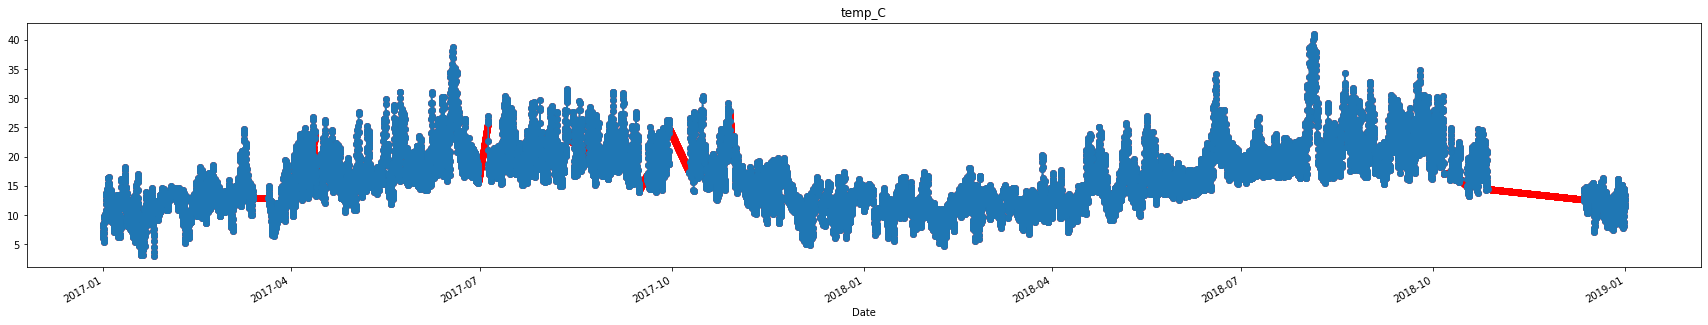

In [185]:
# Interpolate the NaNs by linear method

linear_imput=result_merged.copy(deep=True)

linear_imput.interpolate(method='linear', inplace=True)

linear_imput['temp_C'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

result_merged['temp_C'].plot(title='temp_C', marker='o', figsize=(30, 5))


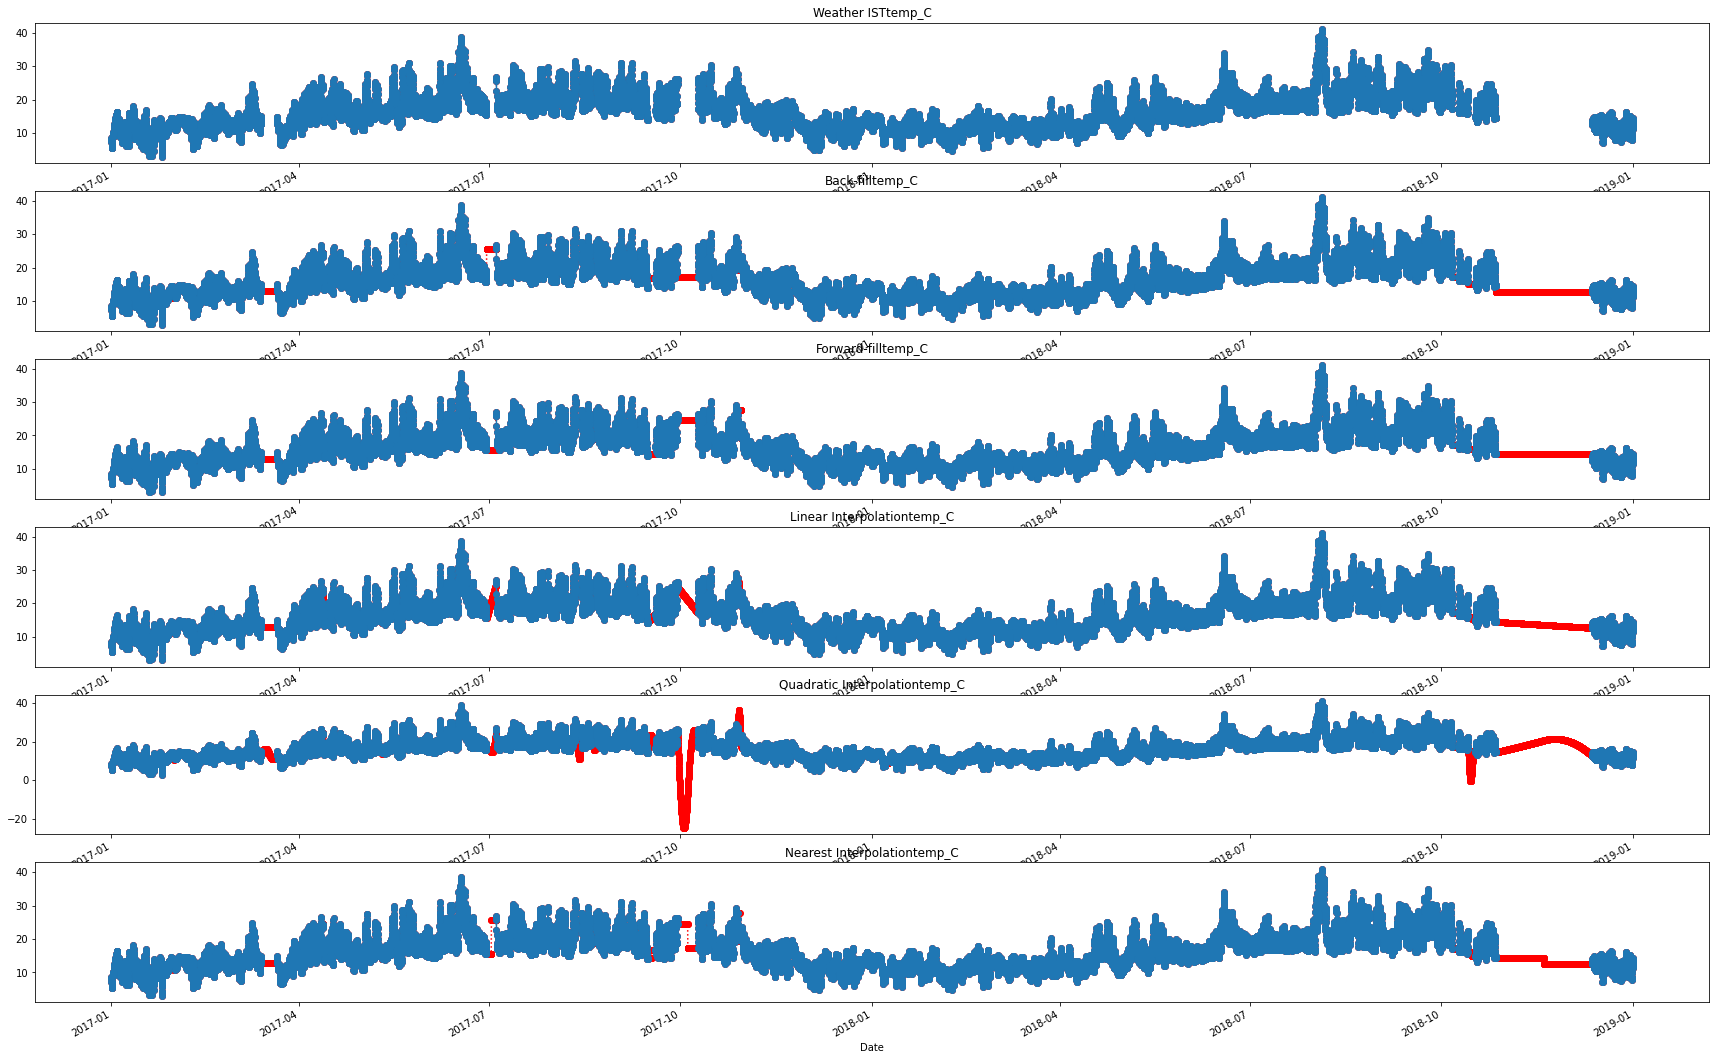

In [190]:
# Set nrows to 3 and ncols to 1
fig, axes = plt.subplots(6, 1, figsize=(30, 20))

# Create a dictionary of interpolations
interpolations = {'Weather IST': result_merged, 'Back-fill':bfill_imputed, 'Forward-fill':ffill_imputed,
                  'Linear Interpolation': linear_imput, 'Quadratic Interpolation': quadratic_imput, 
                  'Nearest Interpolation': nearest_imput}

# Loop over axes and interpolations
for ax, df_key in zip(axes, interpolations):
  # Select and also set the title for a DataFrame
  interpolations[df_key].temp_C.plot(color='red', marker='o', 
                                 linestyle='dotted', ax=ax)
  result_merged.temp_C.plot(title=df_key + 'temp_C', marker='o', ax=ax)
  
plt.show()

### Find alteratives e.g.
Portugal Weather Stations data (from 01 Jan 2016 to 01 Jan 2019)

In [191]:
url ='https://raw.githubusercontent.com/INmais/portugal-weather-stations/gh-pages/data/8579_lisbon.csv'
lisbon = pd.read_csv(url)

In [192]:
lisbon = lisbon.set_index(pd.DatetimeIndex(lisbon['Local time in Lisbon']))

In [193]:
lisbon['T'] = lisbon['T'].astype(str) 

In [194]:
lisbon['T'] = lisbon['T'].apply(lambda x: x.replace(',','.'))

In [196]:
lisbon['T']=lisbon['T'].astype(float)

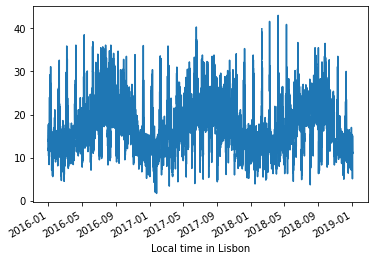

In [197]:
lisbon['T'].plot()

###Using KNN (multivariate)

More info: https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation

In [204]:
result_merged

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,Date_start,Power_kW
Date,,,,,,,,,,
2017-01-01 00:00:00,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083,0.0,0.0,1-1-2017 0:00,74.897706
2017-01-01 01:00:00,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333,0.0,0.0,1-1-2017 1:00,75.173557
2017-01-01 02:00:00,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083,0.0,0.0,1-1-2017 2:00,74.208175
2017-01-01 03:00:00,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000,0.0,0.0,1-1-2017 3:00,73.735889
2017-01-01 04:00:00,6.500250,81.241667,4.006000,5.262333,1028.000000,0.891000,0.0,0.0,1-1-2017 4:00,75.102351
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,13.361667,54.013333,0.000000,0.000000,1031.000000,1.112333,0.0,0.0,31-12-2018 19:00,99.453746
2018-12-31 20:00:00,12.810000,55.441667,0.000000,0.000000,1031.000000,1.322417,0.0,0.0,31-12-2018 20:00,83.188111
2018-12-31 21:00:00,12.565000,55.291667,0.000000,0.000000,1031.000000,1.195500,0.0,0.0,31-12-2018 21:00,82.704752


Recall 
start date: 2017-01-01 00:00:00
Period: 17520

In [198]:
result_copy_knn = result_merged.copy(deep=True)

In [199]:
result_copy_knn.isnull().mean().sort_values(ascending=False)

temp_C           0.121918
HR               0.121918
windSpeed_m/s    0.121918
windGust_m/s     0.121918
pres_mbar        0.121918
solarRad_W/m2    0.121918
rain_mm/h        0.121918
rain_day         0.121918
Date_start       0.000000
Power_kW         0.000000
dtype: float64

In [200]:
result_copy_knn = result_copy_knn.reset_index(drop= True)

In [201]:
result_copy_knn.drop('Date_start', axis=1, inplace=True)

In [202]:
result_copy_knn

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,Power_kW
0,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083,0.0,0.0,74.897706
1,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333,0.0,0.0,75.173557
2,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083,0.0,0.0,74.208175
3,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000,0.0,0.0,73.735889
4,6.500250,81.241667,4.006000,5.262333,1028.000000,0.891000,0.0,0.0,75.102351
...,...,...,...,...,...,...,...,...,...
17515,13.361667,54.013333,0.000000,0.000000,1031.000000,1.112333,0.0,0.0,99.453746
17516,12.810000,55.441667,0.000000,0.000000,1031.000000,1.322417,0.0,0.0,83.188111
17517,12.565000,55.291667,0.000000,0.000000,1031.000000,1.195500,0.0,0.0,82.704752
17518,11.926667,56.530000,0.000000,0.000000,1031.000000,1.117000,0.0,0.0,80.618406


In [203]:
from sklearn.impute import KNNImputer

# Copy the data
result_knn_imputed = result_copy_knn.copy(deep=True)

# Init the transformer
knn_imp = KNNImputer(n_neighbors=3)

# Fit/transform
result_knn_imputed.loc[:, :] = knn_imp.fit_transform(result_knn_imputed)

result_knn_imputed.isnull().sum()

temp_C           0
HR               0
windSpeed_m/s    0
windGust_m/s     0
pres_mbar        0
solarRad_W/m2    0
rain_mm/h        0
rain_day         0
Power_kW         0
dtype: int64

In [211]:
result_copy_knn

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,Power_kW
0,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083,0.0,0.0,74.897706
1,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333,0.0,0.0,75.173557
2,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083,0.0,0.0,74.208175
3,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000,0.0,0.0,73.735889
4,6.500250,81.241667,4.006000,5.262333,1028.000000,0.891000,0.0,0.0,75.102351
...,...,...,...,...,...,...,...,...,...
17515,13.361667,54.013333,0.000000,0.000000,1031.000000,1.112333,0.0,0.0,99.453746
17516,12.810000,55.441667,0.000000,0.000000,1031.000000,1.322417,0.0,0.0,83.188111
17517,12.565000,55.291667,0.000000,0.000000,1031.000000,1.195500,0.0,0.0,82.704752
17518,11.926667,56.530000,0.000000,0.000000,1031.000000,1.117000,0.0,0.0,80.618406


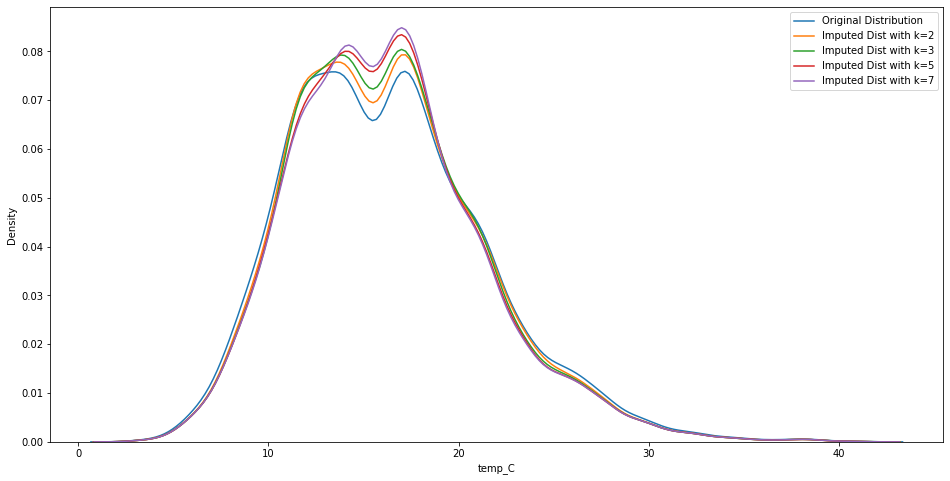

In [212]:
import seaborn as sns
n_neighbors = [2, 3, 5, 7]

fig, ax = plt.subplots(figsize=(16, 8))
# Plot the original distribution
sns.kdeplot(result_copy_knn.temp_C, label="Original Distribution")
for k in n_neighbors:
    knn_imp = KNNImputer(n_neighbors=k)
    result_knn_imputed.loc[:, :] = knn_imp.fit_transform(result_copy_knn)
    sns.kdeplot(result_knn_imputed.temp_C, label=f"Imputed Dist with k={k}")

plt.legend();

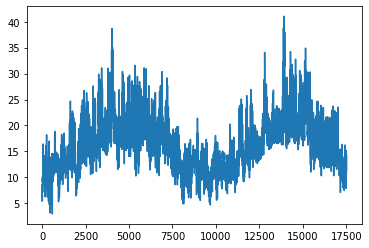

In [213]:
result_knn_imputed['temp_C'].plot()

Recall 
start date: 2017-01-01 00:00:00
Period: 17520

In [215]:
# Create date series using date_range() function
## recall H per year (24*365)
date_series = pd.date_range('2017-01-01', periods = 17520, freq ='H')
date_series

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2018-12-31 14:00:00', '2018-12-31 15:00:00',
               '2018-12-31 16:00:00', '2018-12-31 17:00:00',
               '2018-12-31 18:00:00', '2018-12-31 19:00:00',
               '2018-12-31 20:00:00', '2018-12-31 21:00:00',
               '2018-12-31 22:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', length=17520, freq='H')

In [216]:
date_series = date_series.to_series() # convert to series
#date_series = date_series.strftime('%Y-%m-%d %H:%M')
#date_series = date_series.to_frame()

In [217]:
date_series = date_series.reset_index(drop=True) #reset index

In [218]:
result_knn_imputed = result_knn_imputed.reset_index(drop=True)

In [219]:
result_final = pd.concat([result_knn_imputed, date_series], axis = 1)

In [220]:
result_final.set_index(0, inplace=True, drop=True)

In [ ]:
#result_final.index = merged.index.strftime('%Y-%m-%d %H:%M') #fixig date format

In [221]:
result_final

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,Power_kW
0,,,,,,,,,
2017-01-01 00:00:00,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083,0.0,0.0,74.897706
2017-01-01 01:00:00,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333,0.0,0.0,75.173557
2017-01-01 02:00:00,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083,0.0,0.0,74.208175
2017-01-01 03:00:00,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000,0.0,0.0,73.735889
2017-01-01 04:00:00,6.500250,81.241667,4.006000,5.262333,1028.000000,0.891000,0.0,0.0,75.102351
...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,13.361667,54.013333,0.000000,0.000000,1031.000000,1.112333,0.0,0.0,99.453746
2018-12-31 20:00:00,12.810000,55.441667,0.000000,0.000000,1031.000000,1.322417,0.0,0.0,83.188111
2018-12-31 21:00:00,12.565000,55.291667,0.000000,0.000000,1031.000000,1.195500,0.0,0.0,82.704752


In [223]:
result_final['2018-10-27 00:00:00':'2018-12-09 00:00:00']

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,Power_kW
0,,,,,,,,,
2018-10-27 00:00:00,14.472500,76.583333,0.000000,0.000000,1014.333333,2.792250,0.000000,0.000000,114.233224
2018-10-27 01:00:00,14.452727,76.409091,0.000000,0.000000,1014.000000,2.019091,0.000000,0.000000,113.116840
2018-10-27 02:00:00,15.984881,66.685000,1.268940,1.668190,1020.928571,3.173440,0.000000,0.728571,107.157324
2018-10-27 03:00:00,15.954048,61.723452,2.096917,2.713381,1019.500000,246.671155,0.000000,3.414286,104.352431
2018-10-27 04:00:00,15.040357,58.737857,0.048679,0.074869,1020.571429,71.303833,0.000000,0.685714,103.768277
...,...,...,...,...,...,...,...,...,...
2018-12-08 20:00:00,14.555476,65.389524,3.608536,4.501488,1017.880952,1.394381,0.000000,0.357143,68.699183
2018-12-08 21:00:00,16.836429,55.796310,0.688095,0.850548,1019.833333,124.372405,0.221429,0.642857,70.024984
2018-12-08 22:00:00,16.517005,68.665458,3.192374,4.177958,1019.833333,38.918576,0.000000,0.071429,69.072202


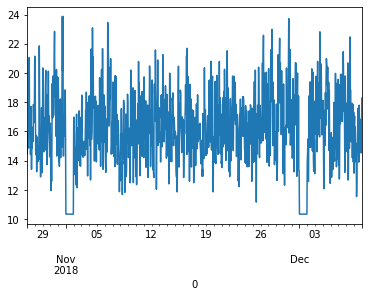

In [225]:
check = result_final['2018-10-27 00:00:00':'2018-12-09 00:00:00']
check['temp_C'].plot()

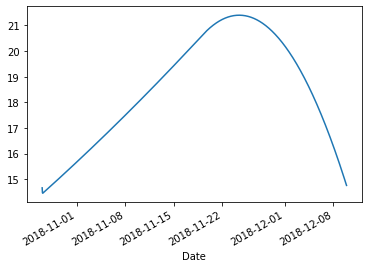

In [233]:
quadratic_imput['temp_C'].loc['2018-10-27':'2018-12-09'].plot()

In [232]:
quadratic_imput['temp_C'].loc['2018-10-27':'2018-12-09']

Date
2018-10-27 00:00:00    14.663333
2018-10-27 01:00:00    14.472500
2018-10-27 02:00:00    14.452727
2018-10-27 03:00:00    14.462838
2018-10-27 04:00:00    14.472953
                         ...    
2018-12-09 19:00:00    14.900159
2018-12-09 20:00:00    14.864803
2018-12-09 21:00:00    14.829351
2018-12-09 22:00:00    14.793802
2018-12-09 23:00:00    14.758158
Name: temp_C, Length: 1057, dtype: float64